# Problem Statement 

    Output variable -> y
    y -> Whether the client has subscribed a term deposit or not 
    Binomial ("yes" or "no")

In [80]:
#Importing Necessary Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.shape

(45211, 17)

In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [22]:
df= pd.get_dummies(df, columns=['job','marital','education','contact','month','poutcome', 'default', 'housing', 'loan','y'], drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,0,0,1,0,0,0,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

# Splitting Data into Training and Testing Set

In [58]:
x= df.iloc[:,0:42]
y= df['y_yes'] 

In [59]:
x 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,1,0,0,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [60]:
y 

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, train_size=0.70, random_state=143)

In [63]:
xtrain 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
41046,45,1433,14,117,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37470,31,143,13,221,2,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
30287,56,14344,5,358,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14255,45,660,14,329,2,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
39528,40,-310,26,133,2,363,5,1,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13231,28,882,8,107,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
25121,30,12569,18,87,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
17937,37,0,30,195,4,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
34969,30,501,6,323,2,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1


# Model Building

In [64]:
from sklearn.linear_model import LogisticRegression 

In [65]:
lg = LogisticRegression()

In [67]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred= lg.predict(xtest)

In [68]:
len(xtest)

13564

In [69]:
len(ypred)

13564

# Model Evaluation

In [83]:
print('Actual Y: ', ytest[:35].values)
print('Predict Y:', ypred[:35])

Actual Y:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Predict Y: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.60      0.24      0.34      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [78]:
confusion_matrix(ytest, ypred)

array([[11751,   255],
       [ 1181,   377]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

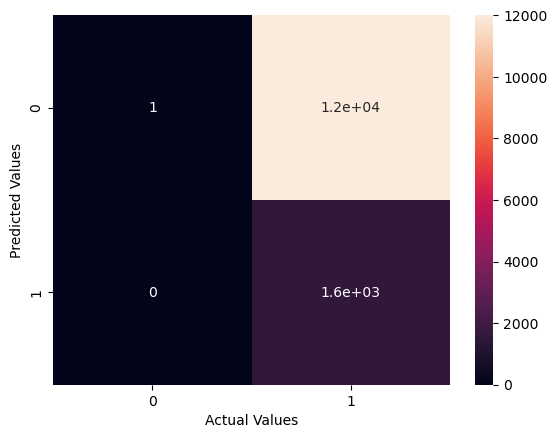

In [100]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')